# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report

In [ ]:
'''
Data Dictionary:

Pregnancies: Number of times pregnant.
Glucose: Plasma glucose concentration.
BloodPressure: blood pressure (mm Hg).
SkinThickness: Triceps skin fold thickness (mm).
Insulin: 2-Hour serum insulin (mu U/ml).
BMI: Body mass index (weight in kg/(height in m)^2).
DiabetesPedigreeFunction: Diabetes pedigree function.
Age: (years).
Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")
'''

In [3]:
# Importing the CSV here
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw.to_csv('../data/raw/diabetes_raw.csv')

In [7]:
print(f'The Dataset has {df_raw.shape[0]} "observations" with {df_raw.shape[1]} columns')

The Dataset has 768 "observations" with 9 columns


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no NULLS

In [9]:
df_raw.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [10]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check: Pregnancies=17, Glucose,BloodPressure,SkinThickness,Insulin,BMI=0

### FEATURES ANALISYS

All features are numerical.

In [11]:
df_len = len(df_raw)

In [32]:
def numerical(df, feature) :
    print(f'='*30)
    print(f'{feature.upper()} ANALISYS')
    print(f'='*30)

    nuniques = df[feature].nunique()
    counts = df[feature].value_counts()
    print(f'There are {nuniques} different values in {feature}')
    print(f'{counts}')

In [33]:
def graphs(df, feature, bins) :
    # hist:
    if bins == 0 :
        df.hist(feature, grid=True, figsize=(6,6), bins=df[feature].nunique())
    else :
        df.hist(feature, grid=True, figsize=(6,6), bins=bins)
    plt.show()
    
    # boxplot:
    sns.catplot(y=feature, kind='box', data=df)
    plt.show()

PREGNANCIES ANALISYS
There are 17 different values in Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


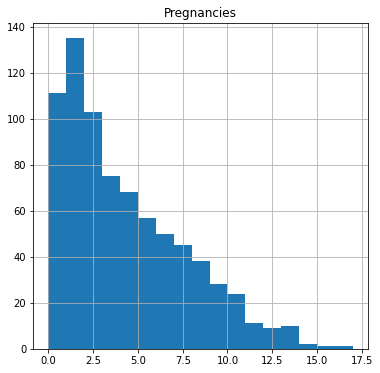

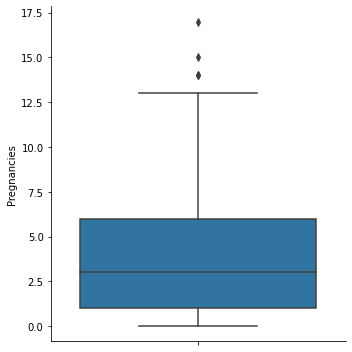

GLUCOSE ANALISYS
There are 136 different values in Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


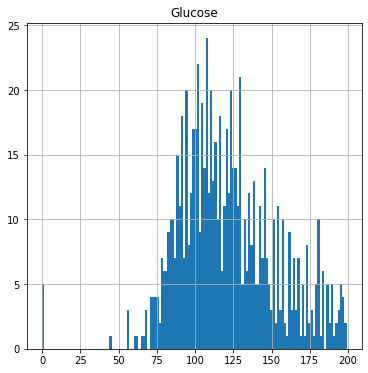

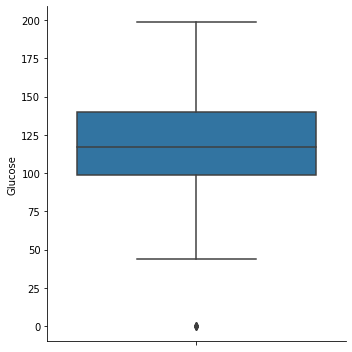

BLOODPRESSURE ANALISYS
There are 47 different values in BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


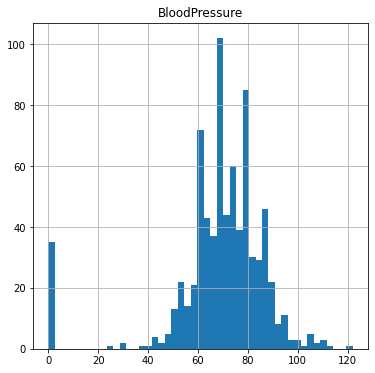

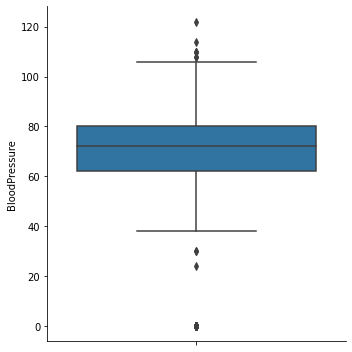

SKINTHICKNESS ANALISYS
There are 51 different values in SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


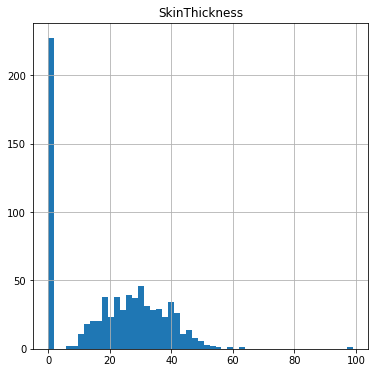

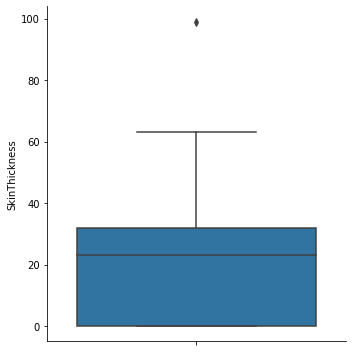

INSULIN ANALISYS
There are 186 different values in Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


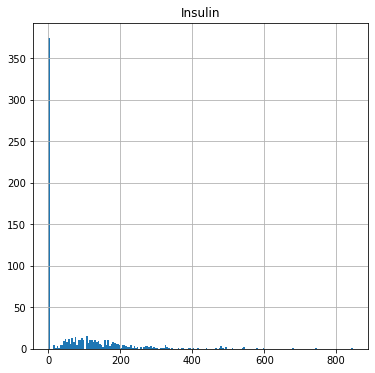

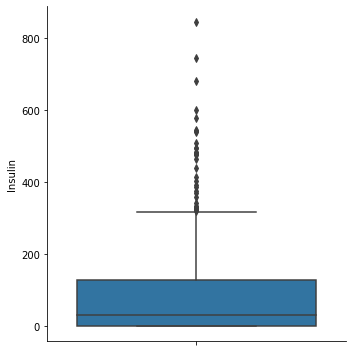

BMI ANALISYS
There are 248 different values in BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64


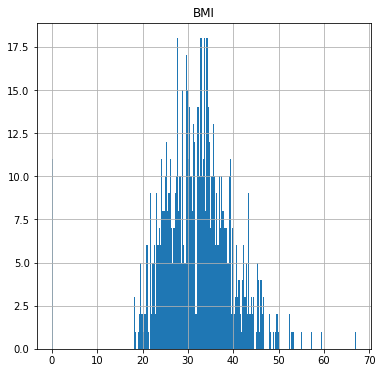

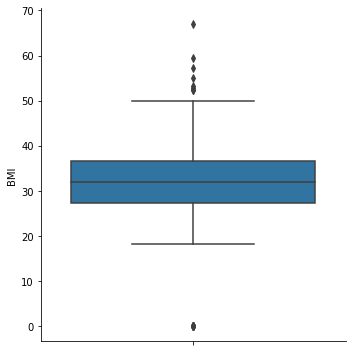

DIABETESPEDIGREEFUNCTION ANALISYS
There are 517 different values in DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


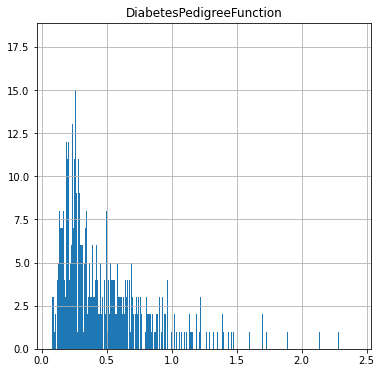

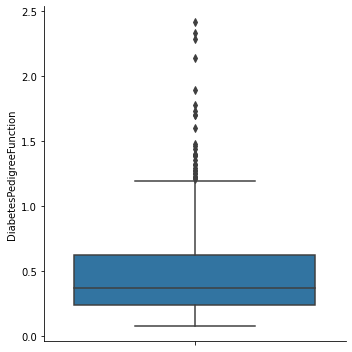

AGE ANALISYS
There are 52 different values in Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


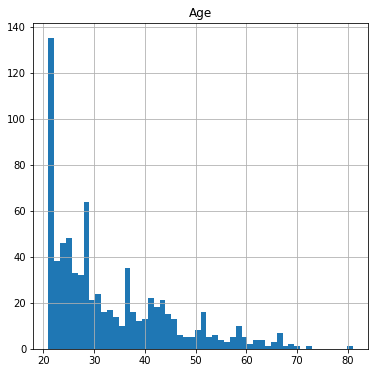

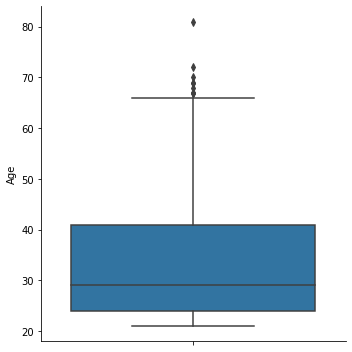

OUTCOME ANALISYS
There are 2 different values in Outcome
0    500
1    268
Name: Outcome, dtype: int64


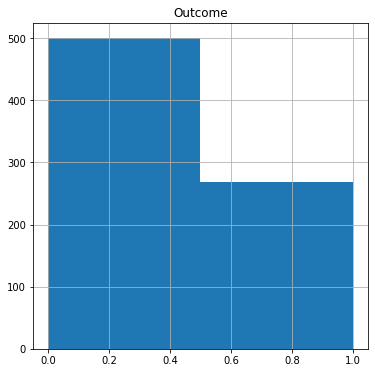

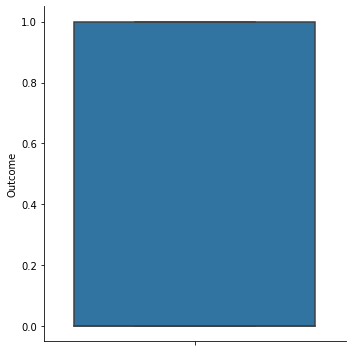

In [34]:
for feature in df_raw.columns :
    numerical(df_raw, feature)
    graphs(df_raw, feature, bins=0)

Conclusions

Pregnancies: remove > 12

Glucose: replace 0 -> median, group 10 [30_200]

BlodPressure: replace 0-> median, remove > 100, group 10 [20_100]

SkinThickness: replace 0 -> median, remove > 60, group 5 [0_60]

Insulin: remove > 300 ?, group 10 [0_300] 

BMI: replace 0 -> median, remoove > 50, grouṕ 5 [15_50]

DiabetesPedigree: remove > 1.2, group 0.100 [0_1.200]

Age: remove > 70, group 10 [20_70]

In [118]:
#df_raw.to_csv('../data/raw/diabetes_raw.csv')
df_interim = df_raw.copy()

In [119]:
def remove_high_outliers(df, feature, max) :
    return df.drop(df[df[feature] > max].index)

In [120]:
# Remove High Outliers:
df_interim = remove_high_outliers(df_interim, 'Pregnancies', max=12)
df_interim = remove_high_outliers(df_interim, 'BloodPressure', max=100)
df_interim = remove_high_outliers(df_interim, 'SkinThickness', max=60)
#df_interim = remove_outliers(df_interim, 'Insulin', max=300)
df_interim = remove_high_outliers(df_interim, 'BMI', max=50)
#df_interim = remove_outliers(df_interim, 'DiabetesPedigreeFunction', max=1.2)
df_interim = remove_high_outliers(df_interim, 'Age', max=70)


PREGNANCIES ANALISYS
There are 13 different values in Pregnancies
1     132
0     106
2     101
3      74
4      67
5      53
6      50
7      45
8      37
9      26
10     23
11      9
12      9
Name: Pregnancies, dtype: int64


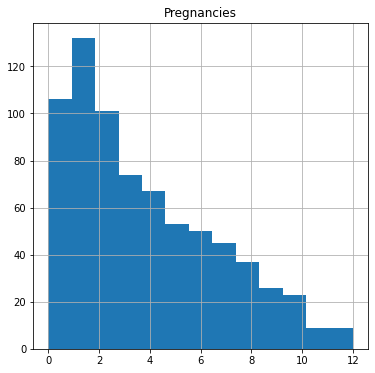

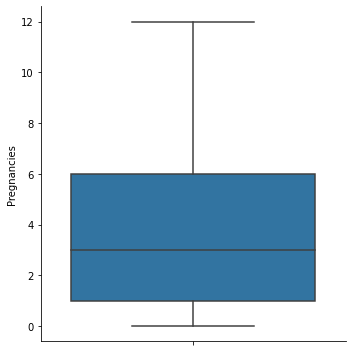

GLUCOSE ANALISYS
There are 136 different values in Glucose
99     17
100    16
111    14
125    14
108    13
       ..
177     1
153     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


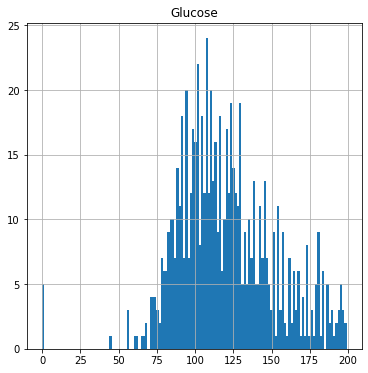

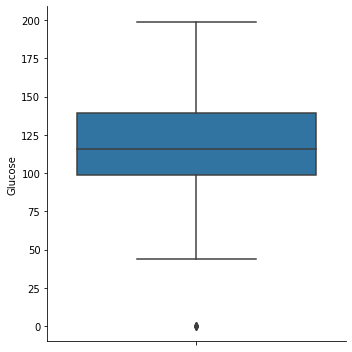

BLOODPRESSURE ANALISYS
There are 40 different values in BloodPressure
70     54
74     51
68     45
78     43
64     43
72     41
80     40
76     38
60     36
62     33
0      32
66     30
82     29
88     24
84     23
86     21
58     21
90     19
50     13
56     12
52     11
54     11
75      8
92      8
65      7
94      6
85      6
48      5
96      4
44      4
55      2
100     2
98      2
46      2
24      1
61      1
30      1
95      1
40      1
38      1
Name: BloodPressure, dtype: int64


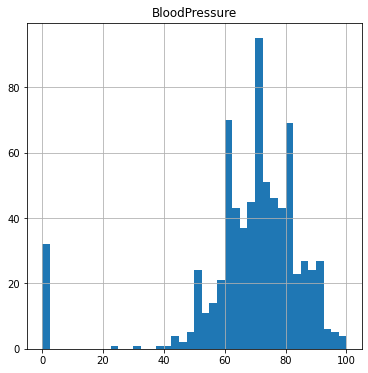

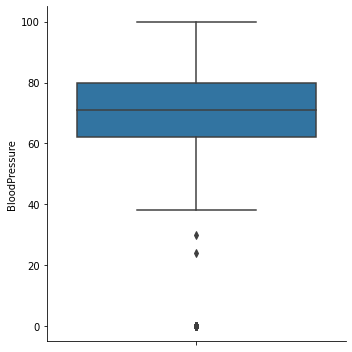

SKINTHICKNESS ANALISYS
There are 48 different values in SkinThickness
0     215
32     30
30     25
27     23
23     21
18     20
28     19
31     18
39     18
19     17
29     17
33     17
40     16
26     16
22     16
25     14
35     14
15     14
37     14
36     14
41     14
17     14
20     13
13     11
24     11
42     10
21     10
34      8
12      7
38      7
14      6
43      6
16      6
45      6
46      6
11      6
44      5
10      5
47      4
48      4
50      3
49      3
7       2
52      2
8       2
51      1
54      1
60      1
Name: SkinThickness, dtype: int64


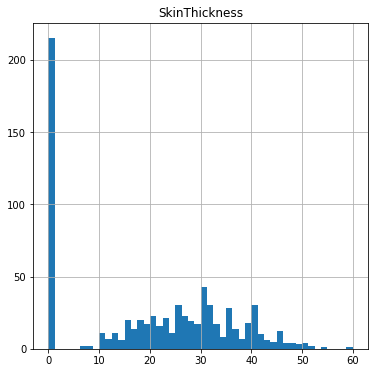

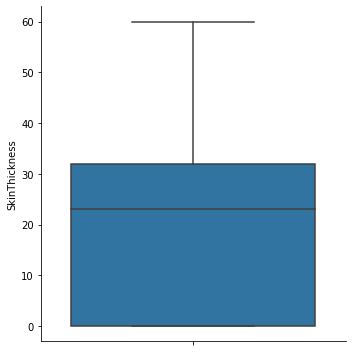

INSULIN ANALISYS
There are 181 different values in Insulin
0      355
105     11
120      8
130      8
140      7
      ... 
108      1
73       1
171      1
255      1
112      1
Name: Insulin, Length: 181, dtype: int64


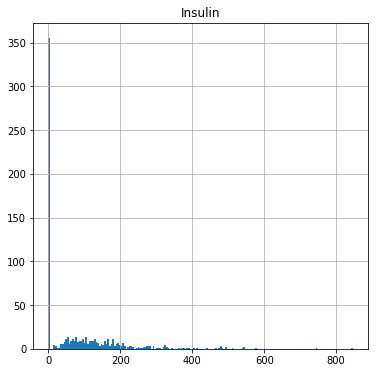

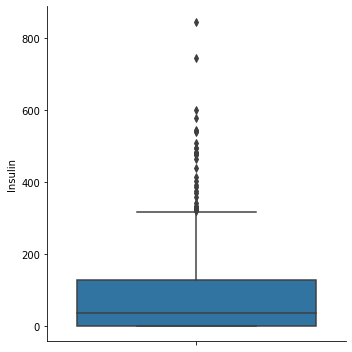

BMI ANALISYS
There are 239 different values in BMI
32.0    13
31.6    12
31.2    11
0.0     11
32.4    10
        ..
39.7     1
30.7     1
49.7     1
24.9     1
46.3     1
Name: BMI, Length: 239, dtype: int64


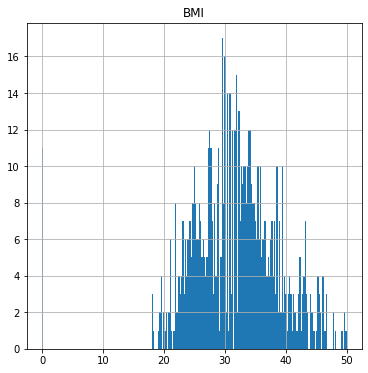

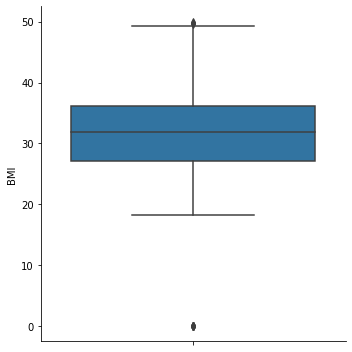

DIABETESPEDIGREEFUNCTION ANALISYS
There are 499 different values in DiabetesPedigreeFunction
0.254    6
0.258    6
0.268    5
0.261    5
0.238    5
        ..
0.226    1
0.612    1
1.353    1
0.655    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 499, dtype: int64


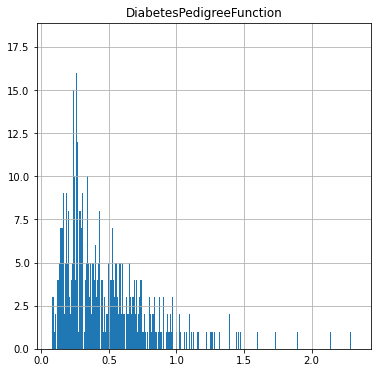

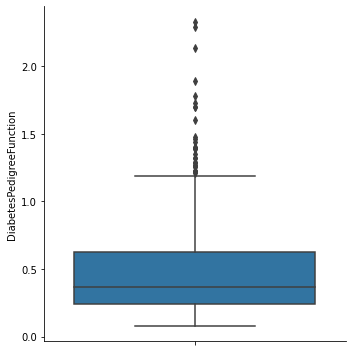

AGE ANALISYS
There are 50 different values in Age
22    71
21    63
24    46
25    46
23    37
28    34
26    31
27    31
29    29
31    24
30    21
41    20
37    17
42    17
33    17
36    16
32    16
34    14
38    14
45    13
46    12
40    12
39    11
43    10
35    10
50     8
51     7
58     7
44     6
52     6
48     5
60     5
54     5
53     5
49     5
47     4
57     4
63     4
55     4
66     4
67     3
62     3
56     3
59     3
65     2
69     2
61     2
64     1
70     1
68     1
Name: Age, dtype: int64


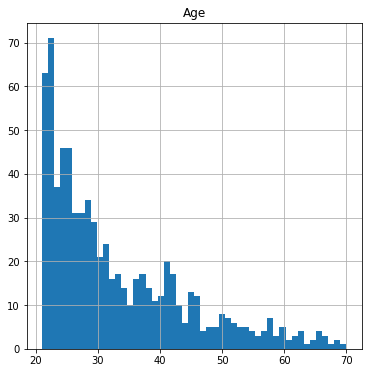

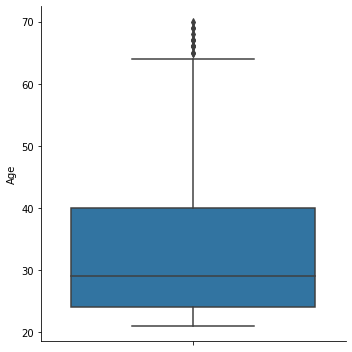

OUTCOME ANALISYS
There are 2 different values in Outcome
0    486
1    246
Name: Outcome, dtype: int64


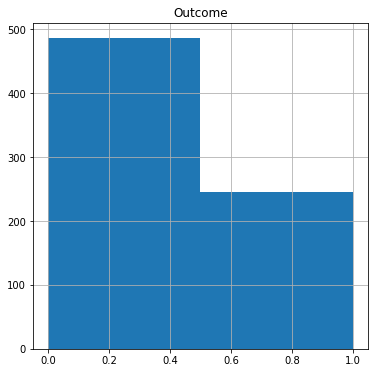

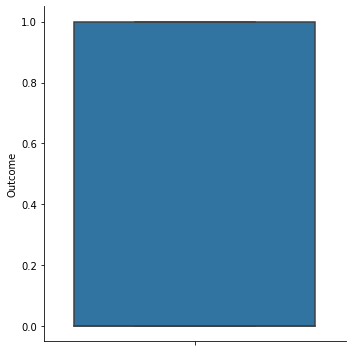

In [122]:
for feature in df_raw.columns :
    numerical(df_interim, feature)
    graphs(df_interim, feature, bins=0)

In [123]:
# replace 0's for median or mean:
features_replace_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for feature in features_replace_values :
    # median:
    # df_interim[feature] = df_interim[feature].mask(df_interim[feature] == 0, df_interim[feature].median())
    # mean:
    df_interim[feature] = df_interim[feature].mask(df_interim[feature] == 0, df_interim[feature].mean())

PREGNANCIES ANALISYS
There are 13 different values in Pregnancies
1     132
0     106
2     101
3      74
4      67
5      53
6      50
7      45
8      37
9      26
10     23
11      9
12      9
Name: Pregnancies, dtype: int64


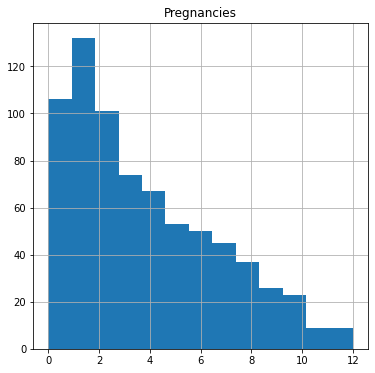

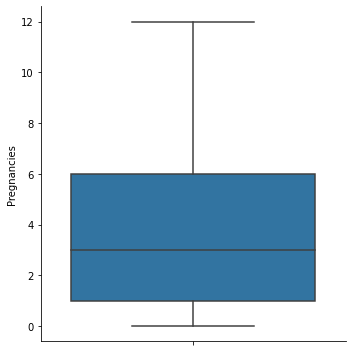

GLUCOSE ANALISYS
There are 136 different values in Glucose
99.0     17
100.0    16
111.0    14
125.0    14
108.0    13
         ..
177.0     1
153.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64


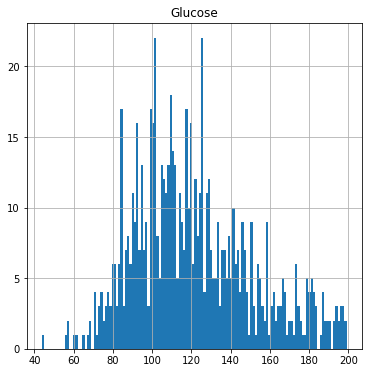

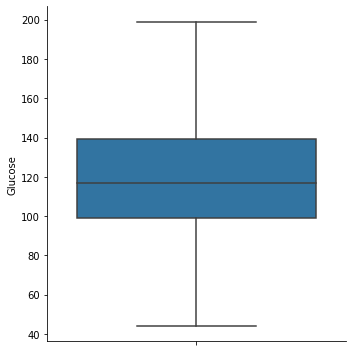

BLOODPRESSURE ANALISYS
There are 40 different values in BloodPressure
70.000000     54
74.000000     51
68.000000     45
78.000000     43
64.000000     43
72.000000     41
80.000000     40
76.000000     38
60.000000     36
62.000000     33
68.498634     32
66.000000     30
82.000000     29
88.000000     24
84.000000     23
86.000000     21
58.000000     21
90.000000     19
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
94.000000      6
85.000000      6
48.000000      5
96.000000      4
44.000000      4
55.000000      2
100.000000     2
98.000000      2
46.000000      2
24.000000      1
61.000000      1
30.000000      1
95.000000      1
40.000000      1
38.000000      1
Name: BloodPressure, dtype: int64


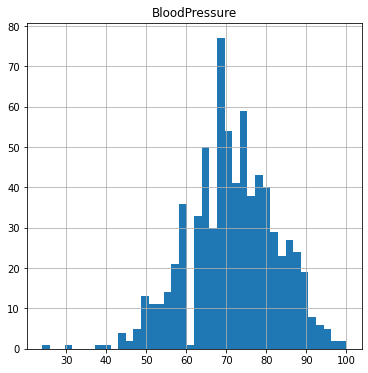

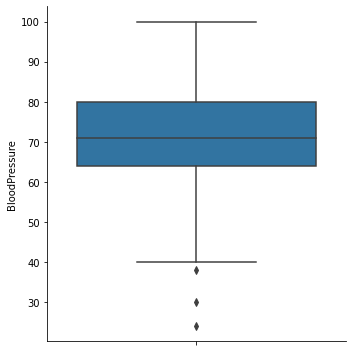

SKINTHICKNESS ANALISYS
There are 48 different values in SkinThickness
20.286885    215
32.000000     30
30.000000     25
27.000000     23
23.000000     21
18.000000     20
28.000000     19
31.000000     18
39.000000     18
19.000000     17
29.000000     17
33.000000     17
40.000000     16
26.000000     16
22.000000     16
25.000000     14
35.000000     14
15.000000     14
37.000000     14
36.000000     14
41.000000     14
17.000000     14
20.000000     13
13.000000     11
24.000000     11
42.000000     10
21.000000     10
34.000000      8
12.000000      7
38.000000      7
14.000000      6
43.000000      6
16.000000      6
45.000000      6
46.000000      6
11.000000      6
44.000000      5
10.000000      5
47.000000      4
48.000000      4
50.000000      3
49.000000      3
7.000000       2
52.000000      2
8.000000       2
51.000000      1
54.000000      1
60.000000      1
Name: SkinThickness, dtype: int64


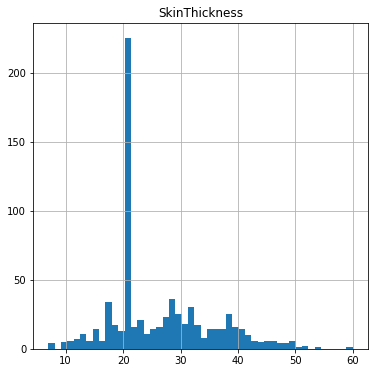

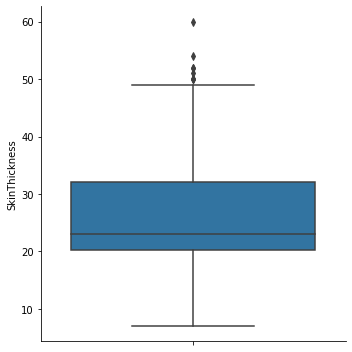

INSULIN ANALISYS
There are 181 different values in Insulin
0      355
105     11
120      8
130      8
140      7
      ... 
108      1
73       1
171      1
255      1
112      1
Name: Insulin, Length: 181, dtype: int64


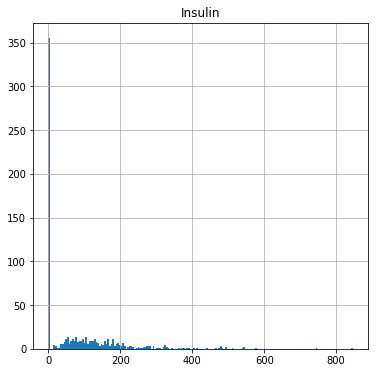

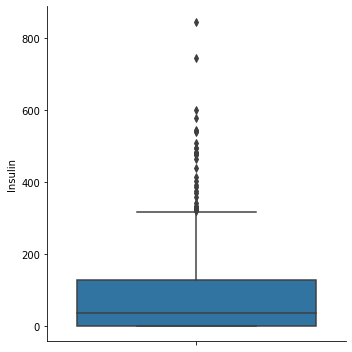

BMI ANALISYS
There are 239 different values in BMI
32.000000    13
31.600000    12
31.200000    11
31.613661    11
32.400000    10
             ..
39.700000     1
30.700000     1
49.700000     1
24.900000     1
46.300000     1
Name: BMI, Length: 239, dtype: int64


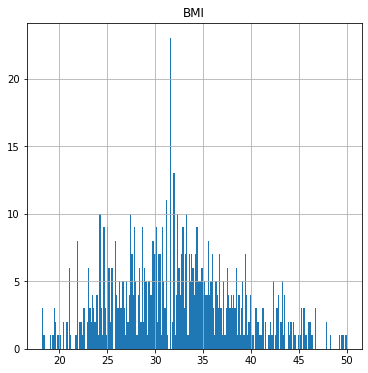

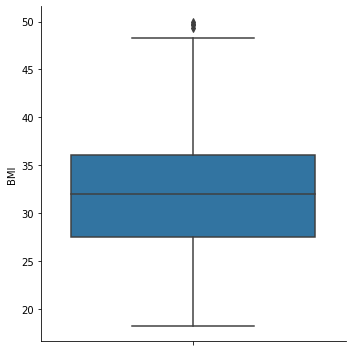

DIABETESPEDIGREEFUNCTION ANALISYS
There are 499 different values in DiabetesPedigreeFunction
0.254    6
0.258    6
0.268    5
0.261    5
0.238    5
        ..
0.226    1
0.612    1
1.353    1
0.655    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 499, dtype: int64


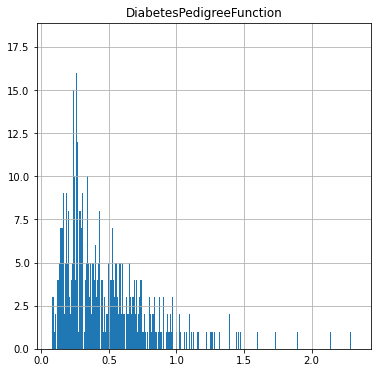

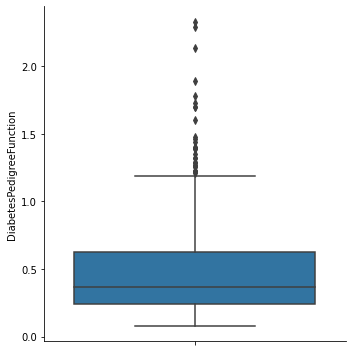

AGE ANALISYS
There are 50 different values in Age
22    71
21    63
24    46
25    46
23    37
28    34
26    31
27    31
29    29
31    24
30    21
41    20
37    17
42    17
33    17
36    16
32    16
34    14
38    14
45    13
46    12
40    12
39    11
43    10
35    10
50     8
51     7
58     7
44     6
52     6
48     5
60     5
54     5
53     5
49     5
47     4
57     4
63     4
55     4
66     4
67     3
62     3
56     3
59     3
65     2
69     2
61     2
64     1
70     1
68     1
Name: Age, dtype: int64


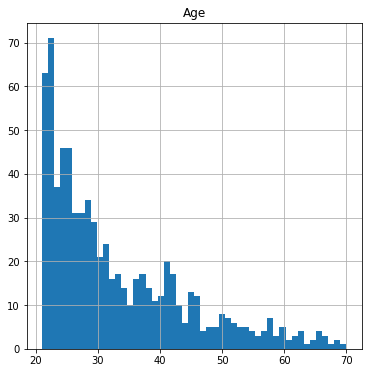

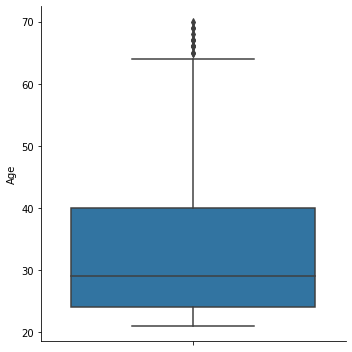

OUTCOME ANALISYS
There are 2 different values in Outcome
0    486
1    246
Name: Outcome, dtype: int64


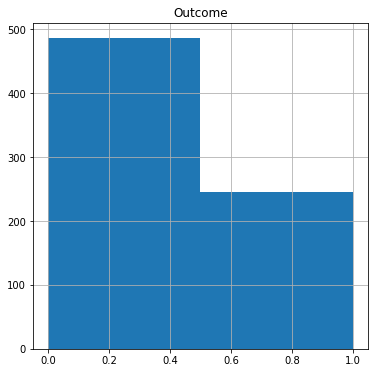

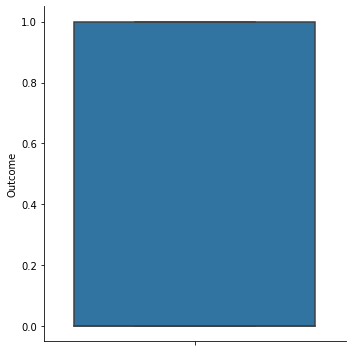

In [124]:
for feature in df_interim.columns :
    numerical(df_interim, feature)
    graphs(df_interim, feature, bins=0)

In [125]:
def remove_low_outliers(df, feature, min) :
    return df.drop(df[df[feature] < min].index)

In [126]:
# Remove Low Outliers:
df_interim = remove_low_outliers(df_interim, 'BloodPressure', min=40)

PREGNANCIES ANALISYS
There are 13 different values in Pregnancies
1     129
0     106
2     101
3      74
4      67
5      53
6      50
7      45
8      37
9      26
10     23
11      9
12      9
Name: Pregnancies, dtype: int64


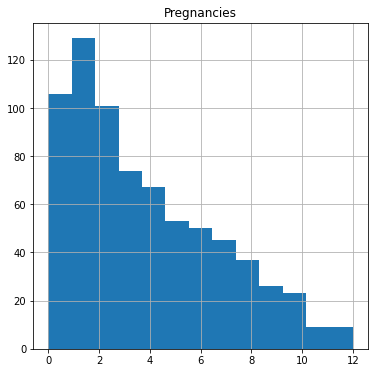

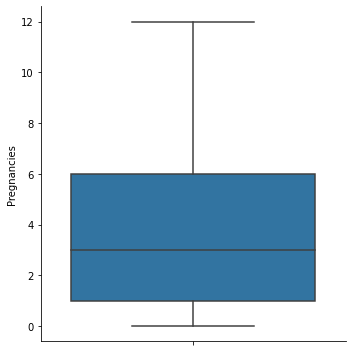

GLUCOSE ANALISYS
There are 136 different values in Glucose
99.0     17
100.0    16
111.0    14
125.0    14
108.0    13
         ..
177.0     1
153.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64


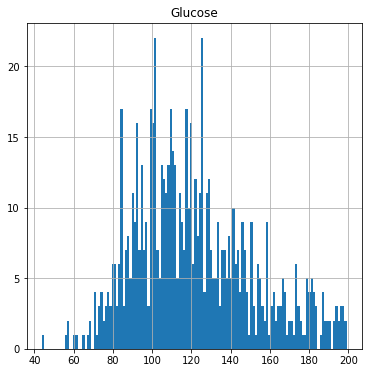

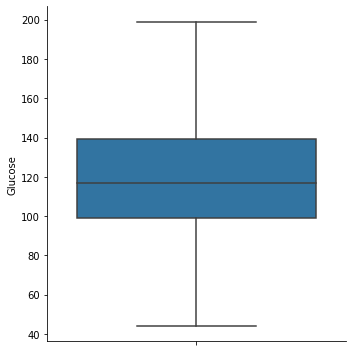

BLOODPRESSURE ANALISYS
There are 37 different values in BloodPressure
70.000000     54
74.000000     51
68.000000     45
64.000000     43
78.000000     43
72.000000     41
80.000000     40
76.000000     38
60.000000     36
62.000000     33
68.498634     32
66.000000     30
82.000000     29
88.000000     24
84.000000     23
86.000000     21
58.000000     21
90.000000     19
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
44.000000      4
96.000000      4
55.000000      2
98.000000      2
46.000000      2
100.000000     2
40.000000      1
95.000000      1
61.000000      1
Name: BloodPressure, dtype: int64


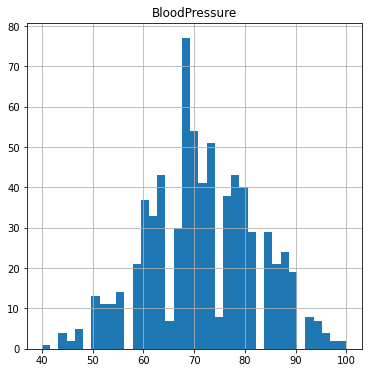

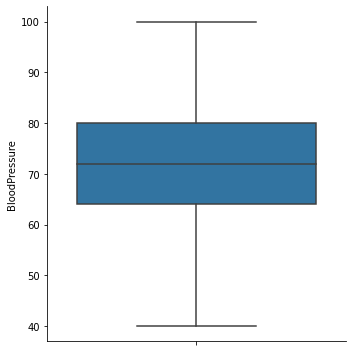

SKINTHICKNESS ANALISYS
There are 48 different values in SkinThickness
20.286885    215
32.000000     30
30.000000     25
27.000000     23
23.000000     21
28.000000     19
18.000000     19
31.000000     18
39.000000     18
33.000000     17
29.000000     17
40.000000     16
19.000000     16
26.000000     16
22.000000     16
25.000000     14
17.000000     14
35.000000     14
37.000000     14
36.000000     14
15.000000     14
41.000000     14
20.000000     13
13.000000     11
24.000000     11
42.000000     10
21.000000     10
34.000000      8
12.000000      7
14.000000      6
38.000000      6
16.000000      6
43.000000      6
46.000000      6
11.000000      6
45.000000      6
44.000000      5
10.000000      5
47.000000      4
48.000000      4
50.000000      3
49.000000      3
7.000000       2
52.000000      2
8.000000       2
51.000000      1
60.000000      1
54.000000      1
Name: SkinThickness, dtype: int64


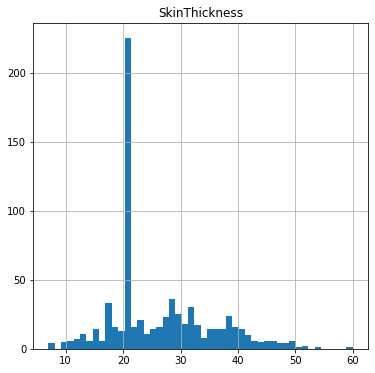

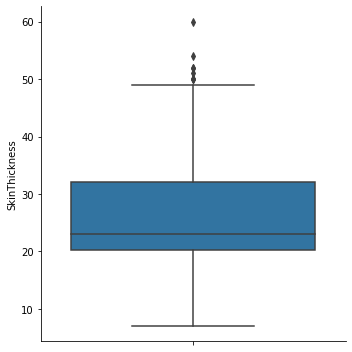

INSULIN ANALISYS
There are 180 different values in Insulin
0      355
105     11
130      8
94       7
180      7
      ... 
270      1
108      1
73       1
171      1
112      1
Name: Insulin, Length: 180, dtype: int64


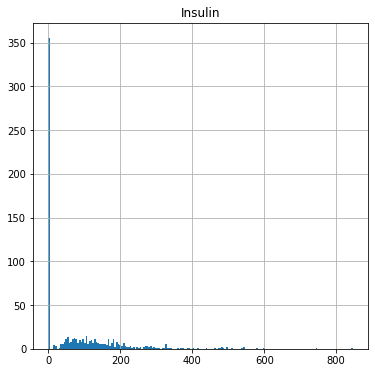

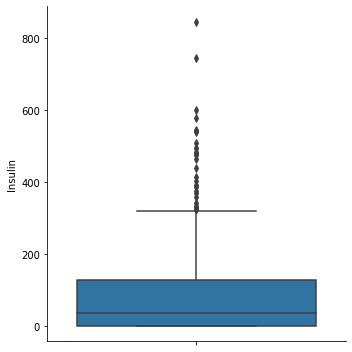

BMI ANALISYS
There are 239 different values in BMI
32.000000    13
31.600000    12
31.613661    11
31.200000    11
32.400000    10
             ..
29.200000     1
18.400000     1
44.100000     1
45.200000     1
46.300000     1
Name: BMI, Length: 239, dtype: int64


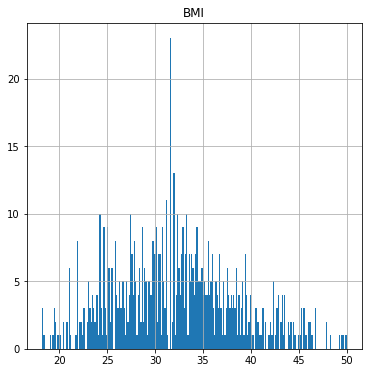

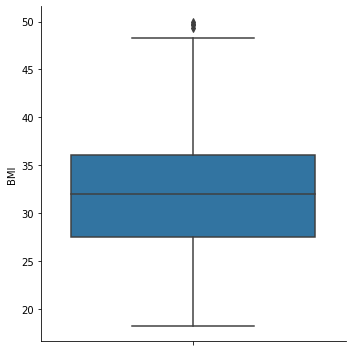

DIABETESPEDIGREEFUNCTION ANALISYS
There are 499 different values in DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.261    5
0.238    5
        ..
0.226    1
0.612    1
1.353    1
0.655    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 499, dtype: int64


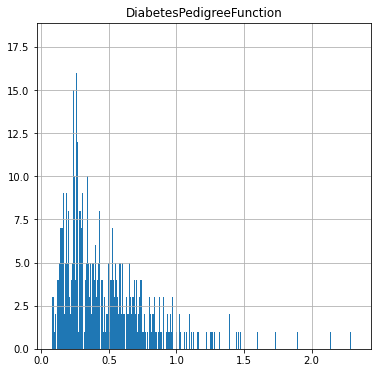

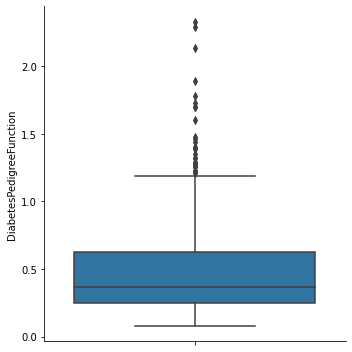

AGE ANALISYS
There are 50 different values in Age
22    71
21    62
24    46
25    46
23    37
28    34
27    31
26    30
29    29
31    24
30    21
41    20
37    17
42    17
36    16
33    16
32    16
34    14
38    14
45    13
46    12
40    12
39    11
43    10
35    10
50     8
51     7
58     7
44     6
52     6
48     5
60     5
54     5
53     5
49     5
47     4
57     4
63     4
55     4
66     4
67     3
62     3
56     3
59     3
65     2
69     2
61     2
64     1
70     1
68     1
Name: Age, dtype: int64


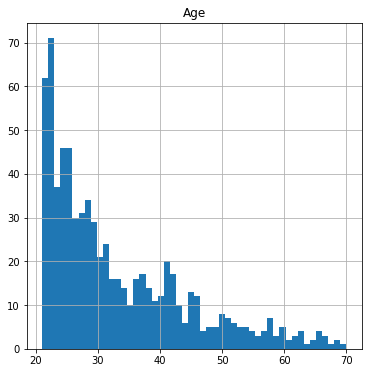

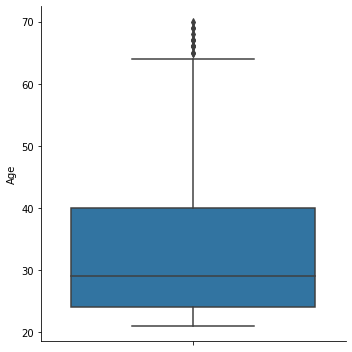

OUTCOME ANALISYS
There are 2 different values in Outcome
0    483
1    246
Name: Outcome, dtype: int64


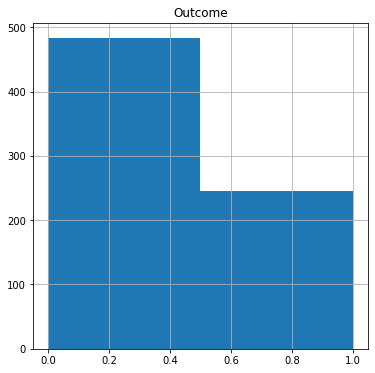

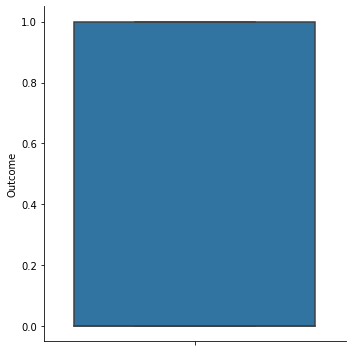

In [132]:
for feature in df_interim.columns :
    numerical(df_interim, feature)
    graphs(df_interim, feature, bins=0)

In [134]:
df_interim.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.659808,121.026897,71.661120,26.250590,80.093278,32.091564,0.471152,32.786008,0.337449
std,3.099901,30.179757,10.800996,9.159361,114.797383,6.389637,0.327304,11.475524,0.473164
min,0.000000,44.000000,40.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.286885,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.000000,36.100000,0.627000,40.000000,1.000000
max,12.000000,199.000000,100.000000,60.000000,846.000000,50.000000,2.329000,70.000000,1.000000


In [136]:
df_interim.to_csv('../data/interim/diabetes_interim.csv')
df = df_interim.copy()

# ML Decison Tree

In [137]:
# Separation: features & target
X = df.drop('Outcome', axis='columns')
Y = df["Outcome"]


In [140]:
# Scale the features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 7.55443125e-01,  8.94361796e-01,  3.13964495e-02, ...,
         2.36237448e-01,  4.76483384e-01,  1.50109135e+00],
       [-8.58619120e-01, -1.19456335e+00, -5.24489256e-01, ...,
        -8.60038638e-01, -3.67349300e-01, -1.55743162e-01],
       [ 1.40106802e+00,  2.05487577e+00, -7.09784491e-01, ...,
        -1.37685451e+00,  6.14064799e-01, -6.85413456e-02],
       ...,
       [ 4.32630676e-01, -8.91838886e-04,  3.13964495e-02, ...,
        -9.22682986e-01, -6.91429969e-01, -2.42944979e-01],
       [-8.58619120e-01,  1.64895871e-01, -1.08037496e+00, ...,
        -3.11900595e-01, -3.73464030e-01,  1.23948590e+00],
       [-8.58619120e-01, -9.29303016e-01, -1.53898786e-01, ...,
        -2.64917334e-01, -4.77414433e-01, -8.53357695e-01]])

In [142]:
# train test split:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, stratify=Y,  test_size=0.3)

In [144]:
# Model & Fit:
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [147]:
# Get the score of train data just to verify its 1.
score = model_dec_tree.score(X_train, Y_train)
print(f'The score for Decision Tree with X_train & Y_trains is: {score}')

#Get the score for the predictions:
score = model_dec_tree.score(X_test, Y_test)
print(f'The score for Decision Tree with X_test & Y_test is: {score}')

The score for Decision Tree with X_train & Y_trains is: 1.0
The score for Decision Tree with X_test & Y_test is: 0.684931506849315


[[105  40]
 [ 29  45]]


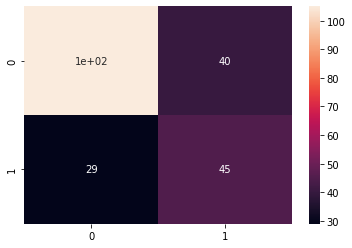

In [149]:
# Confusion Matrix:
print(confusion_matrix(Y_test, model_dec_tree.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,model_dec_tree.predict(X_test)), annot=True)
plt.show()

In [150]:
# classification report:
print(classification_report(Y_test, model_dec_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       145
           1       0.53      0.61      0.57        74

    accuracy                           0.68       219
   macro avg       0.66      0.67      0.66       219
weighted avg       0.70      0.68      0.69       219



In [157]:
# feature importance:
print(f'Features importance: \n {model_dec_tree.feature_importances_}')

# Get the Number of Leaves
print(f'Number of leaves: {model_dec_tree.get_n_leaves()}')

# Tree params
print(f'Tree params: \n {model_dec_tree.get_params()}')

# Tree depth
print(f'Tree depth: {model_dec_tree.get_depth()}')

Features importance: 
 [0.07828108 0.34819494 0.05943117 0.0620497  0.03234779 0.11624447
 0.18664869 0.11680216]
Number of leaves: 96
Tree params: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Tree depth: 12


Train Decision tree with entropy criterion

In [158]:
model_dt_entropy = DecisionTreeClassifier(criterion='entropy')
model_dt_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [160]:
# Score
score = model_dt_entropy.score(X_train, Y_train)
print(f'The score for Decision Tree (entropy) with X_train & Y_trains is: {score}')

# Confusion Matrix:
print(confusion_matrix(Y_test,model_dt_entropy.predict(X_test)))

# Classification report:
print(classification_report(Y_test, model_dt_entropy.predict(X_test)))

# Accuracy:
acc_score = print(accuracy_score(Y_test, model_dt_entropy.predict(X_test)))
print(f'The accuracy for Decision Tree (entropy) with X_test is: {acc_score}')

# Features importance:
print(f'Features importance: \n {model_dt_entropy.feature_importances_}')

# Number of leaves:
print(f'Number of leaves: {model_dt_entropy.get_n_leaves()}')

# Tree params:
print(f'Tree params: \n {model_dt_entropy.get_params()}')

# Tree depth:
print(f'Tree depth: {model_dt_entropy.get_depth()}')

The score for Decision Tree (entropy) with X_train & Y_trains is: 1.0
[[110  35]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       145
           1       0.57      0.62      0.59        74

    accuracy                           0.71       219
   macro avg       0.68      0.69      0.69       219
weighted avg       0.72      0.71      0.72       219

0.7123287671232876
The accuracy for Decision Tree (entropy) with X_test is: None
Features importance: 
 [0.05136511 0.32384416 0.07478819 0.04166906 0.03531991 0.10069992
 0.23565094 0.13666272]
Number of leaves: 87
Tree params: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Tree depth: 15
